***
# **FINAL PROJECT - Analisis Jejaring Sosial**

1. Keenan Ariqul Hashim - 1301202323
2. Risky Aditya Mangngalle - 1301204187

***

## IMPORT LIBRARY ##

In [ ]:
import networkx as nx
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.10).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


## READ DATASET ##

In [ ]:
!rm -r TA/
!git clone https://github.com/keenan09/girvann-newman-method-ajs-project

rm: cannot remove 'TA/': No such file or directory
Cloning into 'girvann-newman-method-ajs-project'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (6/6), 75.76 KiB | 15.15 MiB/s, done.


In [ ]:
df = pd.read_csv("/content/girvann-newman-method-ajs-project/pilpres1.csv", sep=';')
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Nov 09 23:39:31 +0000 2023,1722760863239827545,@Tan_Mar3M Nanti ada saatnya ini orang ditangk...,0,0,0,0,in,1167048413109555201,1722217892115337287,salehali2019,https://twitter.com/salehali2019/status/172276...
1,Thu Nov 09 23:39:30 +0000 2023,1722760859683000377,@korhurint @Paltiwest Tanpa mengecilkan arti P...,0,0,0,0,in,841247796,1722424503702331733,motikatrok,https://twitter.com/motikatrok/status/17227608...
2,Thu Nov 09 23:39:09 +0000 2023,1722760769656504651,@beautylaughter @kdrama_menfess TvN kan sering...,0,0,0,0,in,496481136,1722601889123143794,Gaassee,https://twitter.com/Gaassee/status/17227607696...
3,Thu Nov 09 23:39:05 +0000 2023,1722760751792927161,"@moviemenfes sebenernya gpp di remake, tp gue ...",0,0,0,0,in,1062585300109545472,1722596151025869179,heinnana,https://twitter.com/heinnana/status/1722760751...
4,Thu Nov 09 23:39:02 +0000 2023,1722760740921327657,Bakal calon presiden Ganjar Pranowo menyentil ...,0,1,0,0,in,1279643013455605760,1722760740921327657,Cintada16,https://twitter.com/Cintada16/status/172276074...
...,...,...,...,...,...,...,...,...,...,...,...,...
696,Thu Nov 09 21:36:42 +0000 2023,1722729954260234552,@Dennysiregar7 prabowo jd presiden. kacaw ind...,0,0,0,0,in,891669167379632129,1722387452512666024,filmbokepjepang,https://twitter.com/filmbokepjepang/status/172...
697,Thu Nov 09 21:36:20 +0000 2023,1722729863201857643,@joy_braggadocio @KiCebongMachine @tvOneNews @...,0,0,0,0,in,318831793,1722450341302870038,Thole_7,https://twitter.com/Thole_7/status/17227298632...
698,Thu Nov 09 21:35:50 +0000 2023,1722729735078515001,Gaji presiden lebih besar dari wakil presiden....,0,0,0,0,in,1144359166842044416,1722729735078515001,FendiRahardian,https://twitter.com/FendiRahardian/status/1722...
699,Thu Nov 09 21:35:10 +0000 2023,1722729566274490538,@TMontrado @musniumar Jokowi yg gk bangun apa2...,0,0,0,0,in,1697700100532035584,1722490464270709203,hu52098,https://twitter.com/hu52098/status/17227295662...


In [ ]:
df.shape

(701, 12)

In [ ]:
df.columns

Index(['created_at', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'lang', 'user_id_str',
       'conversation_id_str', 'username', 'tweet_url'],
      dtype='object')

# **Pra Pemrosesan Data 🧹**

In [ ]:
df['username'] = '@' + df['username']

In [ ]:
# Variabel untuk menyimpan hasil pengolahan
data = dict()
for r in df.iterrows():
    # Simpan kolom username sebagai author tweet
    author = r[1]['username']
    # Simpan kolom full_text sebagai tweet yang dituliskan author
    tweet = r[1]['full_text']
    # Mengambil username yang di mention dalam tweet pada kolom full_text
    mentions = re.findall(r'@\w+', tweet)
    # Pada dictionary data simpan semua akun yang di mention author pada tweet
    data[author] = mentions
data

{'@salehali2019': ['@Tan_Mar3M'],
 '@motikatrok': ['@korhurint', '@Paltiwest'],
 '@Gaassee': ['@xaveiclqys', '@kdrama_menfess'],
 '@heinnana': ['@moviemenfes'],
 '@Cintada16': [],
 '@Pakamkalam': ['@yudiharahap46'],
 '@anies4presiden2': ['@Abu_Hanifz', '@musniumar'],
 '@LeBrekele': ['@triwul82'],
 '@echachaa__': ['@tanyakanrl'],
 '@Rasto66010876': ['@muispebrianto'],
 '@sanuktri18465': ['@gus_dibyo'],
 '@papa_ham_': ['@hasyimmah'],
 '@0nc075': ['@swilkinsonbc', '@ZAEffendy', '@jokowi'],
 '@MaloneySlo28707': ['@Melihat_Indo'],
 '@bagaspati168': ['@joko_maryadi'],
 '@wurrie2776': [],
 '@PattonPresiden1': [],
 '@DodaMunte': ['@BangPino__', '@BosPurwa'],
 '@KasanTonimin': ['@gus_dibyo'],
 '@justxddt': ['@txtdrpemerintah'],
 '@SwadayaAhmad': ['@Melihat_Indo'],
 '@halim_sulivan': ['@prabowo'],
 '@detikcom': [],
 '@WismaKarya': ['@txtdrpemerintah'],
 '@Arida_237': ['@gus_dibyo'],
 '@BoisDulces22247': [],
 '@MakganjarSumbar': [],
 '@Jinjiu527328472': ['@gus_dibyo'],
 '@adrianskel': ['@convomfs

In [ ]:
# Membuat dataframe baru
dataset = {"from":[], "to":[]}
# Memisahkan from dan to pada dictionary data yang sudah dibuat sebelumnya
for username_from in data:
  for username_to in data[username_from]:
    dataset["from"].append(username_from)
    dataset["to"].append(username_to)

In [ ]:
# Simpan dataset hasil preprocessing pada final_df
final_df = pd.DataFrame.from_dict(dataset)
final_df

,from,to
0,@salehali2019,@Tan_Mar3M
1,@motikatrok,@korhurint
2,@motikatrok,@Paltiwest
3,@Gaassee,@xaveiclqys
4,@Gaassee,@kdrama_menfess
...,...,...
637,@Thole_7,@KiCebongMachine
638,@Thole_7,@tvOneNews
639,@Thole_7,@jokowi
640,@hu52098,@TMontrado


In [ ]:
final_df.shape

(642, 2)



# **NetworkX Visualization 📑**

In [ ]:
# Membuat graf kosong
G = nx.Graph()

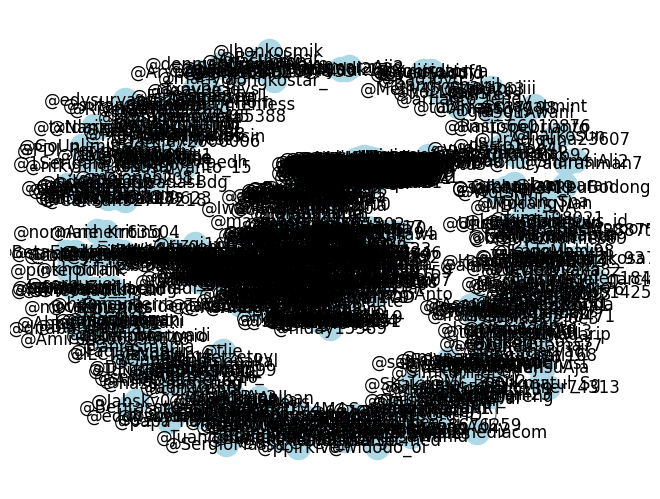

In [ ]:
# Menambahkan edge berdasarkan kolom "User From" dan "User To"
for _, row in final_df.iterrows():
    user_from = row['from']
    user_to = row['to']
    G.add_edge(user_from, user_to)

# Mengatur tata letak (layout) graf
pos = nx.spring_layout(G)

# Menggambar graf
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')

# Menampilkan plot graf
plt.show()

## GIRVAN NEWMAN METHOD ##


Jumlah komunitas:  118
Komunitas 1:  {'@Tan_Mar3M', '@salehali2019', '@WotsiW', '@man_lae'}
Komunitas 2:  {'@Paltiwest', '@priatamvan88', '@korhurint', '@motikatrok', '@Darkie72006006'}
Komunitas 3:  {'@xaveiclqys', '@Donovvi', '@kdrama_menfess', '@Gaassee'}
Komunitas 4:  {'@moviemenfes', '@heinnana'}
Komunitas 5:  {'@Pakamkalam', '@yudiharahap46', '@darto1727'}
Komunitas 6:  {'@hu52098', '@Abu_Hanifz', '@Haerudi50699673', '@TMontrado', '@anies4presiden2', '@musniumar'}
Komunitas 7:  {'@LeBrekele', '@triwul82'}
Komunitas 8:  {'@tlie', '@people_91011', '@yeochinuri', '@hadisasmito99', '@tanyakanrl', '@akudinonakal', '@zetzetzetoy', '@rofiatulazizah_', '@echachaa__'}
Komunitas 9:  {'@muispebrianto', '@Rasto66010876'}
Komunitas 10:  {'@Melon1060_', '@SoghilS40522', '@fitiya99', '@evon_latan21756', '@Tisya6395189551', '@qoryalkatiri', '@Jinkimseok67804', '@JuniPutra2159', '@akuniniamanah', '@chlarmer', '@iamyouralice', '@bolurasataro', '@HSamudi36068', '@vehyae2539', '@Rahmat1678862', '@Da

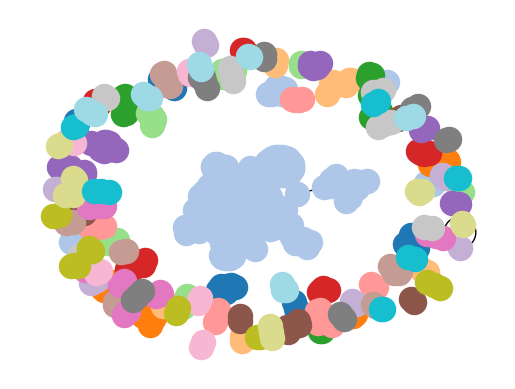

In [ ]:
from matplotlib import colors
# Membangun graf berdasarkan kolom "User From" dan "User To"
G = nx.from_pandas_edgelist(final_df, 'from', 'to')

# Menggunakan algoritma Girvan-Newman untuk deteksi komunitas
communities = nx.algorithms.community.girvan_newman(G)

# Mengambil komunitas teratas
top_communities = next(communities, [])

# Menampilkan jumlah komunitas yang ditemukan
if len(top_communities) > 0:
    print("Jumlah komunitas: ", len(top_communities))

    # Menampilkan anggota komunitas
    for i, community in enumerate(top_communities, start=1):
        print(f"Komunitas {i}: ", community)

    # Menentukan warna untuk setiap komunitas
    num_communities = len(top_communities)
    cmap = plt.get_cmap('tab20', num_communities)
    node_colors = [colors.rgb2hex(cmap(i)) for i in range(num_communities)]

    # Menampilkan graf dengan komunitas yang terdeteksi
    pos = nx.spring_layout(G)
    for i, community in enumerate(top_communities):
        nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=node_colors[i])
    nx.draw_networkx_edges(G, pos)
    plt.axis('off')  # Nonaktifkan sumbu koordinat
    plt.show()
else:
    print("Tidak ditemukan komunitas.")


Jumlah komunitas:  10
Komunitas 1:  {'@Melon1060_', '@SoghilS40522', '@fitiya99', '@evon_latan21756', '@Tisya6395189551', '@qoryalkatiri', '@Jinkimseok67804', '@JuniPutra2159', '@akuniniamanah', '@chlarmer', '@iamyouralice', '@bolurasataro', '@HSamudi36068', '@vehyae2539', '@Rahmat1678862', '@DaengKarra98946', '@xojngn', '@116O34', '@KayleighKa64814', '@mmiesakura', '@julies_2382137', '@Ranisor', '@AkhmadRivai79', '@kieranknoff', '@SaputraAkh55353', '@YDamin52891', '@setrigka', '@ngisorgempol', '@Jinjiu527328472', '@ArdiHibin85204', '@noerjakub', '@calistayei', '@314O56', '@AliandaVev81969', '@ste_fan17', '@ordinarmy', '@UmmiYusniar', '@Kzkgaiist03', '@Firman390077519', '@Munir_Timur', '@januriya88', '@Bonang041021', '@bolehsabar', '@UmarSoleh17', '@Gus_Raharjo', '@masbams70', '@zulfahmiza', '@StanleyChu60572', '@yusufxdayt', '@sutrisno_gusty', '@HenningKen26648', '@closemeeye', '@thidrwheel', '@ilhamswag99', '@shintarii', '@aniesbaswedan', '@arisman_aja', '@lihatdariatas', '@RedaShirl

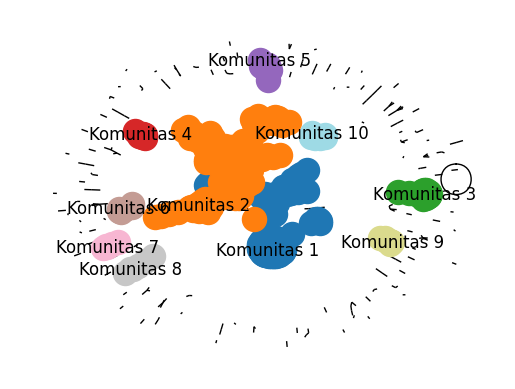

In [ ]:
# Membangun graf berdasarkan kolom "User From" dan "User To"
G = nx.from_pandas_edgelist(final_df, 'from', 'to')

# Menggunakan algoritma Girvan-Newman untuk deteksi komunitas
communities = nx.algorithms.community.girvan_newman(G)

# Mengambil komunitas teratas
top_communities = next(communities, [])

# Menentukan jumlah komunitas yang ingin ditampilkan
num_communities_to_show = 10

# Mengurutkan komunitas berdasarkan jumlah edge
sorted_communities = sorted(top_communities, key=lambda c: G.subgraph(c).size(), reverse=True)

# Mengambil 5 komunitas teratas berdasarkan jumlah edge
top_communities = sorted_communities[:num_communities_to_show]

# Menampilkan jumlah komunitas yang ditemukan
if len(top_communities) > 0:
    print("Jumlah komunitas: ", len(top_communities))

    # Menampilkan anggota komunitas
    for i, community in enumerate(top_communities, start=1):
        print(f"Komunitas {i}: ", community)

    # Menentukan warna untuk setiap komunitas
    num_communities = len(top_communities)
    cmap = plt.get_cmap('tab20', num_communities)
    node_colors = [colors.rgb2hex(cmap(i)) for i in range(num_communities)]

    # Menampilkan graf dengan komunitas yang terdeteksi
    pos = nx.spring_layout(G)
    for i, community in enumerate(top_communities):
        community_list = list(community)  # Ubah objek set menjadi daftar (list)
        nx.draw_networkx_nodes(G, pos, nodelist=community_list, node_color=node_colors[i])
        labels = {community_list[0]: f"Komunitas {i+1}"}  # Hanya label pada node pertama dalam komunitas
        nx.draw_networkx_labels(G, pos, labels, font_color='black')  # Menampilkan label pada node pertama saja
    nx.draw_networkx_edges(G, pos)
    plt.axis('off')  # Nonaktifkan sumbu koordinat
    plt.show()
else:
    print("Tidak ditemukan komunitas.")


In [ ]:
for i, community in enumerate(top_communities, start=1):
    subgraph = G.subgraph(community)
    degree_centrality = nx.degree_centrality(subgraph)
    sorted_users = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

    print(f"User paling berpengaruh dalam komunitas {i}:")
    for j, (user, centrality) in enumerate(sorted_users[:3], start=1):  # Mencari 3 user paling berpengaruh
        print(f"   {j}. {user} (Sentralitas: {centrality})")

User paling berpengaruh dalam komunitas 1:
   1. @gus_dibyo (Sentralitas: 0.6972972972972973)
   2. @Gus_Raharjo (Sentralitas: 0.08108108108108109)
   3. @aniesbaswedan (Sentralitas: 0.04864864864864865)
User paling berpengaruh dalam komunitas 2:
   1. @prabowo (Sentralitas: 0.12658227848101267)
   2. @jokowi (Sentralitas: 0.10126582278481013)
   3. @ganjarpranowo (Sentralitas: 0.08227848101265822)
User paling berpengaruh dalam komunitas 3:
   1. @AgustiniRahay12 (Sentralitas: 0.9473684210526315)
   2. @bnsphrxyz (Sentralitas: 0.10526315789473684)
   3. @sakkusaitna (Sentralitas: 0.05263157894736842)
User paling berpengaruh dalam komunitas 4:
   1. @andre_rosiade (Sentralitas: 0.8333333333333333)
   2. @saifulmujani (Sentralitas: 0.6666666666666666)
   3. @ruangngupi (Sentralitas: 0.3333333333333333)
User paling berpengaruh dalam komunitas 5:
   1. @tanyakanrl (Sentralitas: 0.625)
   2. @yeochinuri (Sentralitas: 0.375)
   3. @zetzetzetoy (Sentralitas: 0.25)
User paling berpengaruh dala